 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
file_path = Path("Resources/whale_returns.csv")

whale_df = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_df.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
file2 = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(file2, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
algo_df.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [7]:
# Drop nulls
algo_df = algo_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
file3 = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(file3, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

#Drops all dollar signs $
sp500_df = sp500_df.replace({r'\$':''}, regex = True)

#Changed Close into a float from an object
sp500_df['Close'] = pd.to_numeric(sp500_df['Close'], errors='coerce')





In [11]:
# Calculate Daily Returns
daily_return_sp500 = sp500_df.pct_change()
daily_return_sp500.head()


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
daily_return_sp500 = daily_return_sp500.dropna()
daily_return_sp500.isnull().sum()
daily_return_sp500


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_return_sp500.rename(columns = {'Close':'SP500'}, inplace = True)

In [14]:
daily_return_sp500

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

# Combined all data together to create a pivot table where the columns are the closing prices for each ticker
combined_df1 = pd.concat([whale_df, algo_df, daily_return_sp500], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df1.sort_index(inplace=True)

# Set column names
combined_df1.columns = ['SP500', 'SORO', 'PAULSON', 'TIGER', 'BERK', 'ALGO1', 'ALGO2']
combined_df1.head()


,SP500,SORO,PAULSON,TIGER,BERK,ALGO1,ALGO2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily returns per portfolio'}, xlabel='Date'>

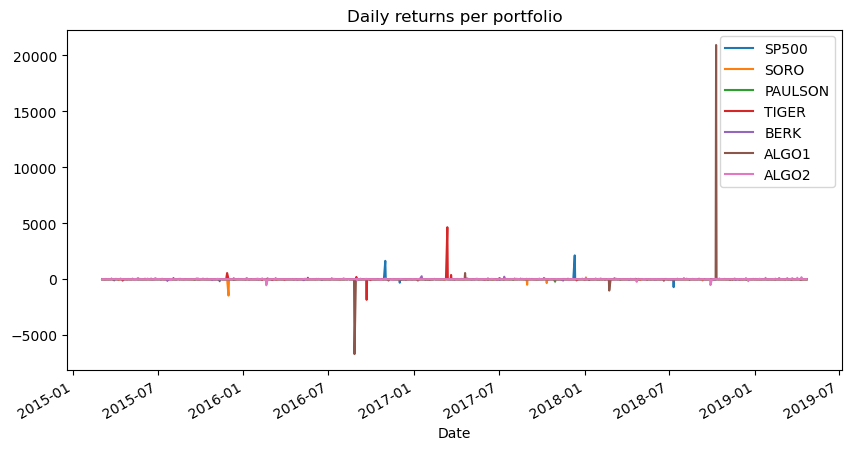

In [16]:
# Plot daily returns of all portfolios
# Used pct_change to calculate daily returns and then plotted the data 
daily_returns_1 = combined_df1.pct_change()
# Plot data
daily_returns_1.plot(figsize=(10,5), title="Daily returns per portfolio")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all portfolios over the Last 5 Years'}, xlabel='Date'>

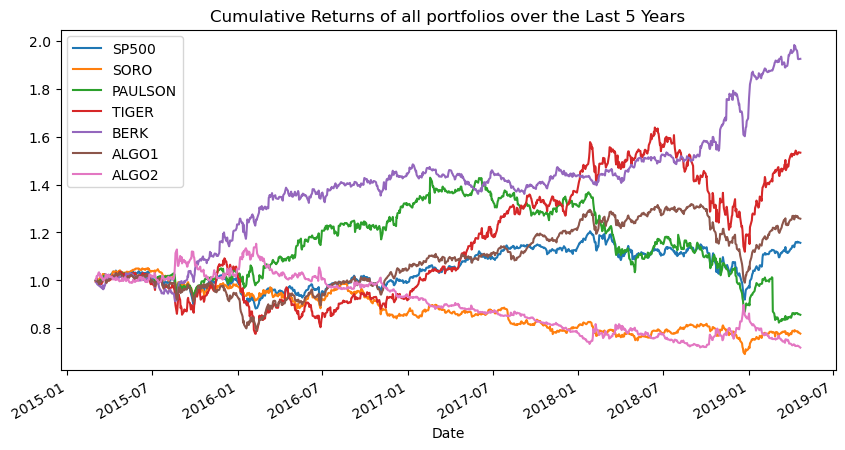

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns1 = (1 + combined_df1).cumprod()

# Plot cumulative returns

cumulative_returns1.plot(figsize=(10,5), title="Cumulative Returns of all portfolios over the Last 5 Years")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

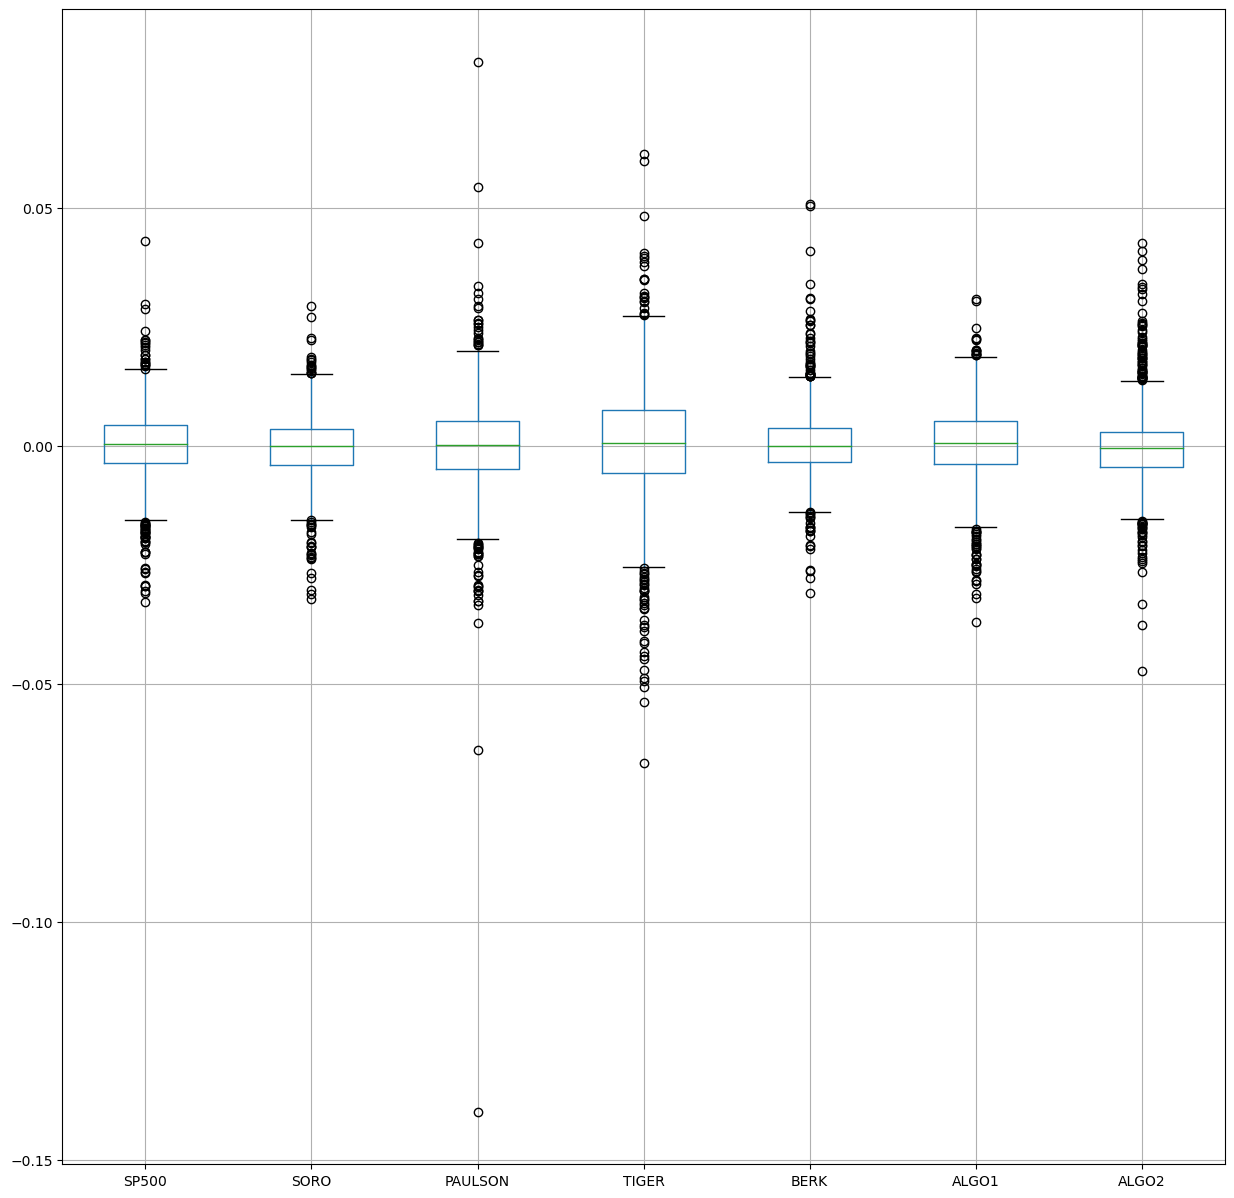

In [18]:
# Box plot to visually show risk
combined_df1.boxplot(figsize=(15,15))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_df1.std()


SP500      0.007896
SORO       0.007026
PAULSON    0.010897
TIGER      0.012919
BERK       0.007623
ALGO1      0.008341
ALGO2      0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
combined_df1[['SP500']].std()
# Determine which portfolios are riskier than the S&P 500


SP500    0.007896
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
a_standard_deviation = combined_df1.std() * np.sqrt(252)
# Used to sort the values to determine which sportfolio is the rickest
a_standard_deviation.sort_values(inplace=True)
a_standard_deviation

SORO       0.111527
BERK       0.121006
SP500      0.125348
ALGO1      0.132413
ALGO2      0.136313
PAULSON    0.172989
TIGER      0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation 21-day window '}, xlabel='Date'>

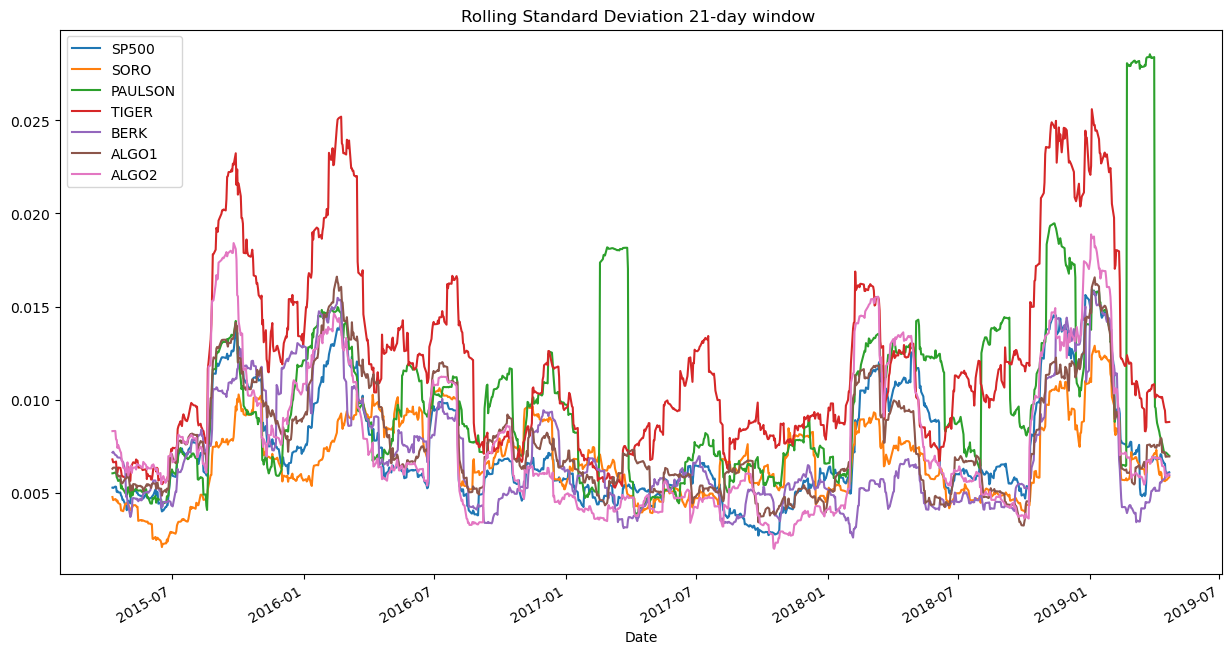

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
Rolling_21 = combined_df1.rolling(window=27).std()
# Plot the rolling standard deviation
Rolling_21.plot(figsize=(15,8), title="Rolling Standard Deviation 21-day window ")

### Calculate and plot the correlation

<AxesSubplot:>

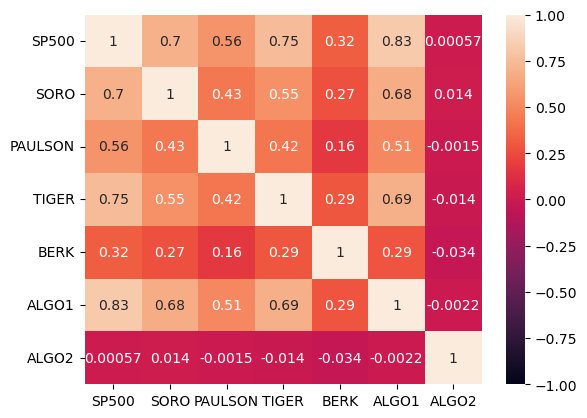

In [23]:
# Calculate the correlation
correlation = combined_df1.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [24]:
# Calculate covariance of a single portfolio ***
algo1_covariance = combined_df1['ALGO1'].cov(combined_df1['SP500'])

algo1_covariance

5.445168594202288e-05

In [25]:

# Calculate variance of S&P 500
variance = combined_df1['SP500'].var()
variance

6.234979670064984e-05

In [26]:
# Computing beta
algo1_beta = algo1_covariance / variance
print(f"Algo: {algo1_beta}")



Algo: 0.8733257977319974


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [27]:
# Use `ewm` to calculate the rolling window
combined_df1.ewm(span=21,).std()
combined_df1.dropna()

,SP500,SORO,PAULSON,TIGER,BERK,ALGO1,ALGO2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df1.mean() * 252) / (combined_df1.std() * np.sqrt(252))
sharpe_ratios

SP500      0.342894
SORO      -0.491422
PAULSON   -0.130186
TIGER      0.606743
BERK       1.369589
ALGO1      0.484334
ALGO2     -0.518582
dtype: float64

<AxesSubplot:>

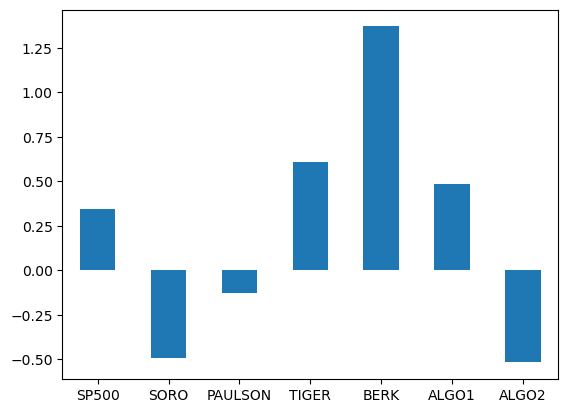

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(rot=0)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

I believe that the algorithmic strategies preformed close to or a bit below the S&P 500 and the whales portfolios. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
apple = Path("Resources/aapl_historical.csv")
apple_df = pd.read_csv(apple, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [31]:
# Reading data from 2nd stock
google = Path("Resources/goog_historical.csv")
google_df = pd.read_csv(google, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [32]:
# Reading data from 3rd stock
cost = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

In [33]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([apple_df, google_df, cost_df], axis="columns", join="inner")
combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62


In [34]:
# Reset Date index
combined_df.sort_index(inplace=True)
combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,GOOG,1098.26,COST,195.76
2018-05-14,AAPL,188.15,GOOG,1100.20,COST,195.88
2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48
2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60


In [35]:
# Reorganize portfolio data by having a column per symbol
combined_df.columns = ['Symbol', 'AAPL', 'Symbol','GOOG', 'Symbol', 'COST']
# Dropped 'Symbol' because it was no longer needed
combined_df.drop('Symbol', axis=1, inplace=True)
combined_df

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60
...,...,...,...
2019-05-03,211.75,1185.40,244.62
2019-05-06,208.48,1189.39,244.23
2019-05-07,202.86,1174.10,240.18


In [36]:
# Calculate daily returns
combined_df.pct_change()

# Drop NAs
combined_df.dropna()

# Display sample data
combined_df.head(20)

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60
2018-05-18,186.31,1066.36,198.96
2018-05-21,187.63,1079.58,199.62
2018-05-22,187.16,1069.73,198.97
2018-05-23,188.36,1079.69,198.14


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_df.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-11    494.203333
2018-05-14    494.743333
2018-05-15    487.050000
2018-05-16    489.553333
2018-05-17    488.393333
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame
combined_df2 = pd.concat([portfolio_returns], axis = 'columns', join = 'inner')
# Added 'Portfolio_returns' since that column was empty
combined_df2.columns = ['PortR']




In [50]:
combined_df2 = combined_df2.pct_change()

In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_df2.dropna(inplace=True)
# Sort index in date order
combined_df2.sort_index()



,PortR
Trade DATE,
2018-05-14,0.001093
2018-05-15,-0.015550
2018-05-16,0.005140
2018-05-17,-0.002370
2018-05-18,-0.009248
...,...
2019-05-03,0.016922
2019-05-06,0.000201
2019-05-07,-0.015200


## Re-run the risk analysis with your portfolio to see how it compares to the others


### Calculate the Annualized Standard Deviation

In [52]:
# Combining the two data sets to compare

combined_df3 = pd.concat([combined_df2, combined_df1], axis='columns', join='inner')
combined_df3.sort_index(inplace=True)

combined_df3

,PortR,SP500,SORO,PAULSON,TIGER,BERK,ALGO1,ALGO2
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333
...,...,...,...,...,...,...,...,...
2019-04-15,0.004805,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


In [53]:
# Calculate the annualized `std`
annualized = combined_df3.std() * np.sqrt(252)

annualized.sort_values(inplace=True)
annualized

SORO       0.116928
BERK       0.133927
ALGO1      0.139499
SP500      0.146812
ALGO2      0.152469
PortR      0.228977
PAULSON    0.232898
TIGER      0.247305
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

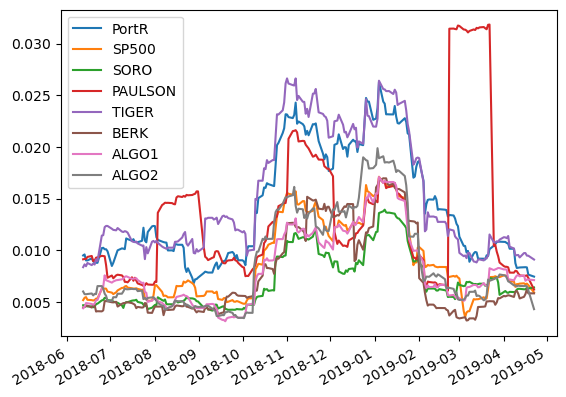

In [54]:
# Calculate rolling standard deviation
combined_df3.std()
# Plot rolling standard deviation
combined_df3.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

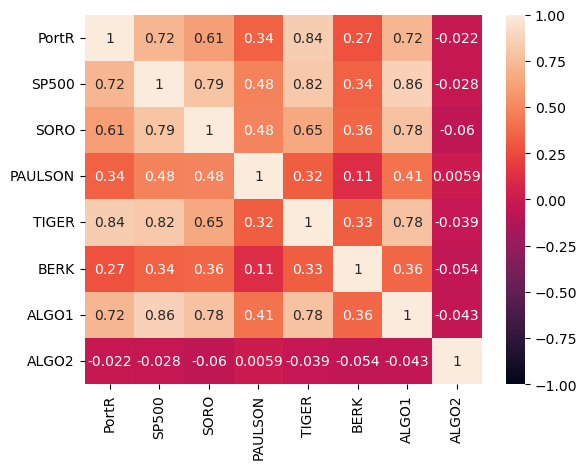

In [55]:
# Calculate and plot the correlation
price_correlation = combined_df3.corr()
# Using the heatmap function to visualize correlations
sns.heatmap(price_correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [56]:
# Calculate and plot Beta
# Calculate covariance of all daily returns of PortR vs. SP500
covariance = combined_df3['PortR'].cov(combined_df3['SP500'])
covariance

9.65161193688159e-05

In [57]:
# Calculate Variance of SP500
variance = combined_df3['SP500'].var()
variance


8.55303578204949e-05

In [58]:
# Calculate Beta of PortR
port_beta = covariance / variance
port_beta

1.1284428339628503

<AxesSubplot:title={'center':'Rolling 60-Day Beta of PortR'}>

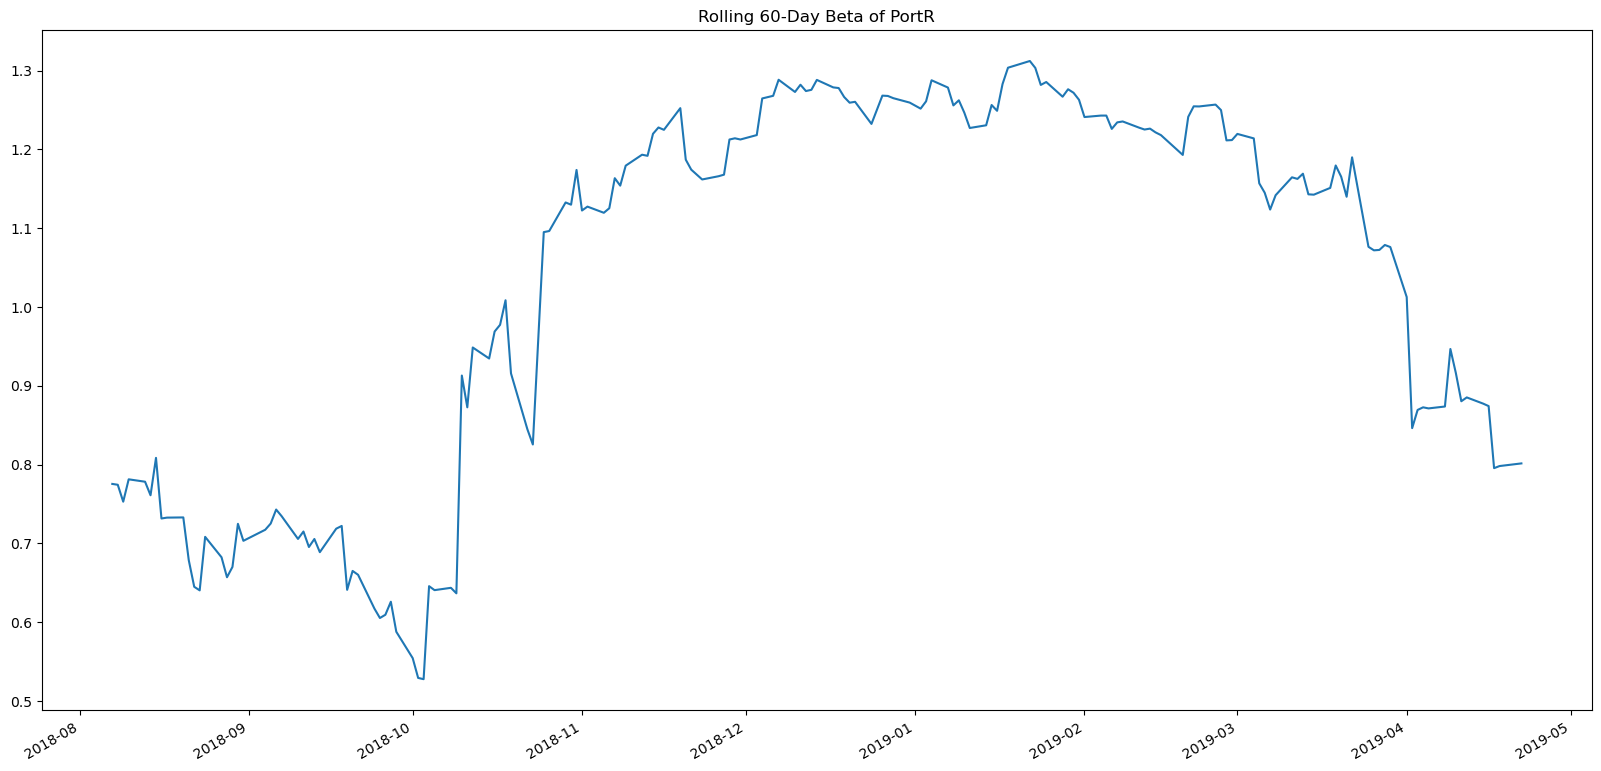

In [59]:
# Calculate 60-day rolling covariance of PortR vs. SP500
rolling_covariance = combined_df3['PortR'].rolling(window=60).cov(combined_df3['SP500'])

# Calculate 60-day rolling variance of PortR vs. SP500
rolling_variance = combined_df3['SP500'].rolling(window=60).var()

# Calculate 60-day rolling beta of PortR 
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of PortR')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [60]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (combined_df3.mean() * 252) / (combined_df3.std() * np.sqrt(252))
sharpe_ratios



PortR      0.743348
SP500      0.380007
SORO       0.227577
PAULSON   -1.066635
TIGER      0.103006
BERK       2.001260
ALGO1      0.007334
ALGO2     -0.427676
dtype: float64

<AxesSubplot:>

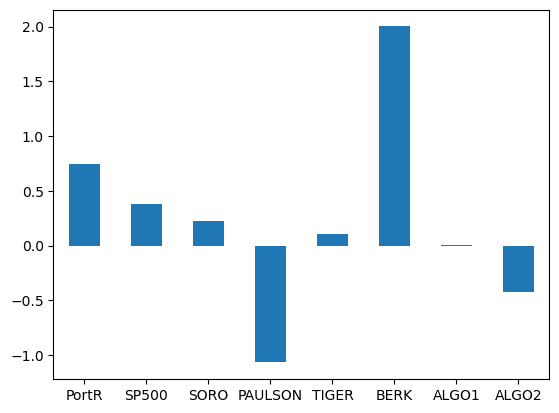

In [61]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(rot=0)


### How does your portfolio do?

Write your answer here!

In [ ]:
'''My portfoilio did better than most of the competition but Mr.Berk is miles away from me.'''
